# Projekt praktyczny (regresja)

## Zbiór danych *Life Expectancy Data.csv* następujące kolumny:
- Country - państwo\
- Status - kraj rozwijający się / rozwinięty\
- Life expectancy - oczekiwana długość życia w latach\
- Adult Mortality - śmiertelność wśród dorosłych, prawdopodobieństwo śmierci w wieku między 15 a 60 lat na 1000 osób\
- infant deaths - śmiertelnośc noworodków w przeliczeniu na 1000 urodzeń\
- Alcohol - konsumpcja alkoholu wśród osób 15+ [w litrach]\
- percentage expenditure - udział wydatków na sektor zdrowia w PKB per capita\
- Hepatitis B - udział zaszczepionych dzieci do 1 roku życia na WZW typu B\
- Measles - liczba odnotowanych przypadków zachorowań na odrę na 1000 mieszkańców\
- BMI\
- under-five deaths - liczba śmierci na 1000 dzieci poniżej 5 roku życia\
- Polio - udział zaszczepionych dzieci do 1 roku życia na Polio\
- Total expenditure - udział wydatków na sektor zdrowia w całości wydatków rządowych\
- Diphtheria - udział zaszczepionych dzieci do 1 roku życia na błonicę i krztusiec\
- HIV/AIDS - śmierci dzieci poniżej 5 roku życia na 1 000 żywych urodzeń spowodowane HIV/AIDS\
- GDP - PKB per capita\
- Population - liczba mieszkańców\
- thinness 1-19 years - rozpowszechnienie chudości w wieku 1 -19 lat\
- thinness 5-9 years - rozpowszechnienie chudości w wieku 5 - 9 lat\
- Income composition of resources - Wskaźnik rozwoju społecznego HDI Human Development Index\
- Schooling - liczba lat nauczania szkolnego\

# Celem projektu jest:
1. przygotowanie i analiza dostarczonych danych
2. budowa i analiza jakości modeli do prognozy oczekiwanej długości życia w latach
3. ocena opracowanych modeli

## Zaimportuj biblioteki

In [30]:
import pandas as pd
import numpy as np

## Wczytaj plik *Life Expectancy Data.csv* oraz wyświetl kilka pierwszych wierszy



In [43]:
df = pd.read_csv('Life Expectancy Data.csv', sep=';')

In [32]:
df.head(5)

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Preprocessing
- wyświetl rozmiar zbioru
- sprawdź ilość NaN-ów
- jesli występują kolumny z dużą lością NaN-ów usuń je
- sprawdź statystyki NaN-ów dla wierszy (m.in. jaka jest mininalna, maxymalna, srednia liczba nanów w wierszu). Jeśli są wiersze, dla których jest >=5 braki usuń je i zresetuj indexy
- wyświetl wiersze od 170 do 175
- pozostałe NaN-y uzupełnij średnią
- oblicz statystyki opisowe

In [33]:
df.size

3843

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Status                           183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    int64  
 5   Alcohol                          6 non-null      float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    int64  
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    int64  
 11  Polio                            183 non-null    float64
 12  Total expenditure     

In [44]:
df = df.drop(columns=['Alcohol', 'Total expenditure'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Status                           183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    int64  
 5   percentage expenditure           183 non-null    float64
 6   Hepatitis B                      174 non-null    float64
 7   Measles                          183 non-null    int64  
 8   BMI                              181 non-null    float64
 9   under-five deaths                183 non-null    int64  
 10  Polio                            183 non-null    float64
 11  Diphtheria                       183 non-null    float64
 12  HIV/AIDS              

In [45]:
nan_counts = df.isnull().sum(axis=1)

# Calculate statistics
min_nan = nan_counts.min()
max_nan = nan_counts.max()
avg_nan = nan_counts.mean()

print("Minimum number of NaNs in a row:", min_nan)
print("Maximum number of NaNs in a row:", max_nan)
print("Average number of NaNs in a row:", avg_nan)

Minimum number of NaNs in a row: 0
Maximum number of NaNs in a row: 5
Average number of NaNs in a row: 0.5737704918032787


In [46]:
df = df.dropna(thresh=df.shape[1] - 4)

In [48]:
df = df.reset_index(drop=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          182 non-null    object 
 1   Status                           182 non-null    object 
 2   Life expectancy                  182 non-null    float64
 3   Adult Mortality                  182 non-null    float64
 4   infant deaths                    182 non-null    int64  
 5   percentage expenditure           182 non-null    float64
 6   Hepatitis B                      174 non-null    float64
 7   Measles                          182 non-null    int64  
 8   BMI                              180 non-null    float64
 9   under-five deaths                182 non-null    int64  
 10  Polio                            182 non-null    float64
 11  Diphtheria                       182 non-null    float64
 12  HIV/AIDS              

In [52]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Replace NaN values with the average value of each numeric column
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          182 non-null    object 
 1   Status                           182 non-null    object 
 2   Life expectancy                  182 non-null    float64
 3   Adult Mortality                  182 non-null    float64
 4   infant deaths                    182 non-null    int64  
 5   percentage expenditure           182 non-null    float64
 6   Hepatitis B                      182 non-null    float64
 7   Measles                          182 non-null    int64  
 8   BMI                              182 non-null    float64
 9   under-five deaths                182 non-null    int64  
 10  Polio                            182 non-null    float64
 11  Diphtheria                       182 non-null    float64
 12  HIV/AIDS              

# Wizualizacja

Wykonaj wykresy rozkładu (histogram i ramka-wąsy) zmiennej *Life expectancy* skategoryzowane w zalezności od statusu kraju. Zinterpretuj wyniki.

In [54]:
import matplotlib.pyplot as plt

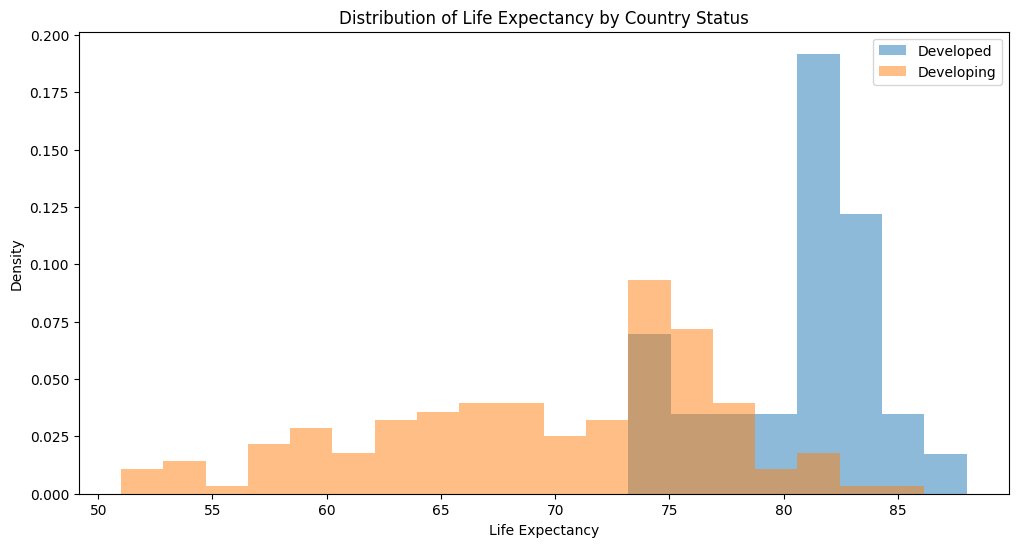

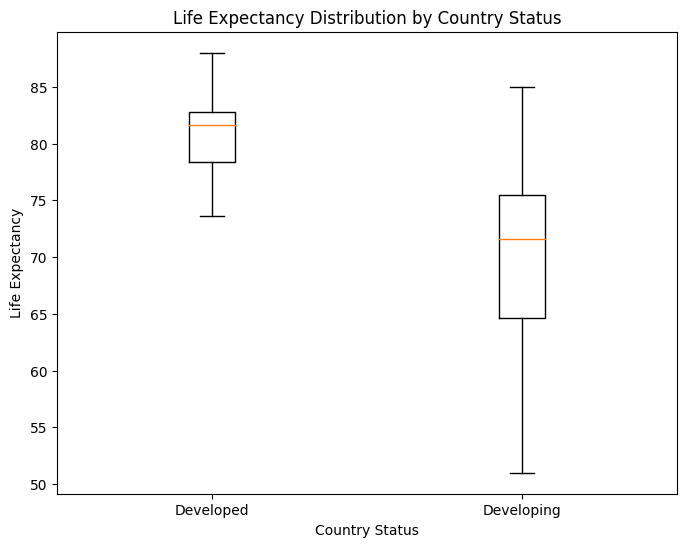

In [58]:
# Create separate DataFrames for Developed and Developing countries
developed_df = df[df['Status'] == 'Developed']
developing_df = df[df['Status'] == 'Developing']

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(developed_df['Life expectancy'], bins=20, alpha=0.5, label='Developed', density=True, range=(df['Life expectancy'].min(), df['Life expectancy'].max()))
plt.hist(developing_df['Life expectancy'], bins=20, alpha=0.5, label='Developing', density=True, range=(df['Life expectancy'].min(), df['Life expectancy'].max()))
plt.title('Distribution of Life Expectancy by Country Status')
plt.xlabel('Life Expectancy')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot box plots
plt.figure(figsize=(8, 6))
plt.boxplot([developed_df['Life expectancy'], developing_df['Life expectancy']], labels=['Developed', 'Developing'])
plt.title('Life Expectancy Distribution by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()


W krajach rozwiniętych srednia dlugosc zycia, najkrotsza i najdluzsza jest wieksza od odpowiednikow w nierozwinietych i jest mniejszy rozrzut wynikow.

W krajach rozwijajacych taki rozrzut moze wynikac min ze stanu wojennego, czesci krajow bedacych biednych do tego stopnia ze duza czesc spoleczenstwa gloduje, albo nie stac ich na podstawowe leki

# Korelacja
Wykonaj macierz korelacji dla zmiennych ilościowych. Z którymi zmiennymi skorelowana jest zmienna *Life expectancy*. Zinterpretuj te korelacje.

In [60]:
import seaborn as sns


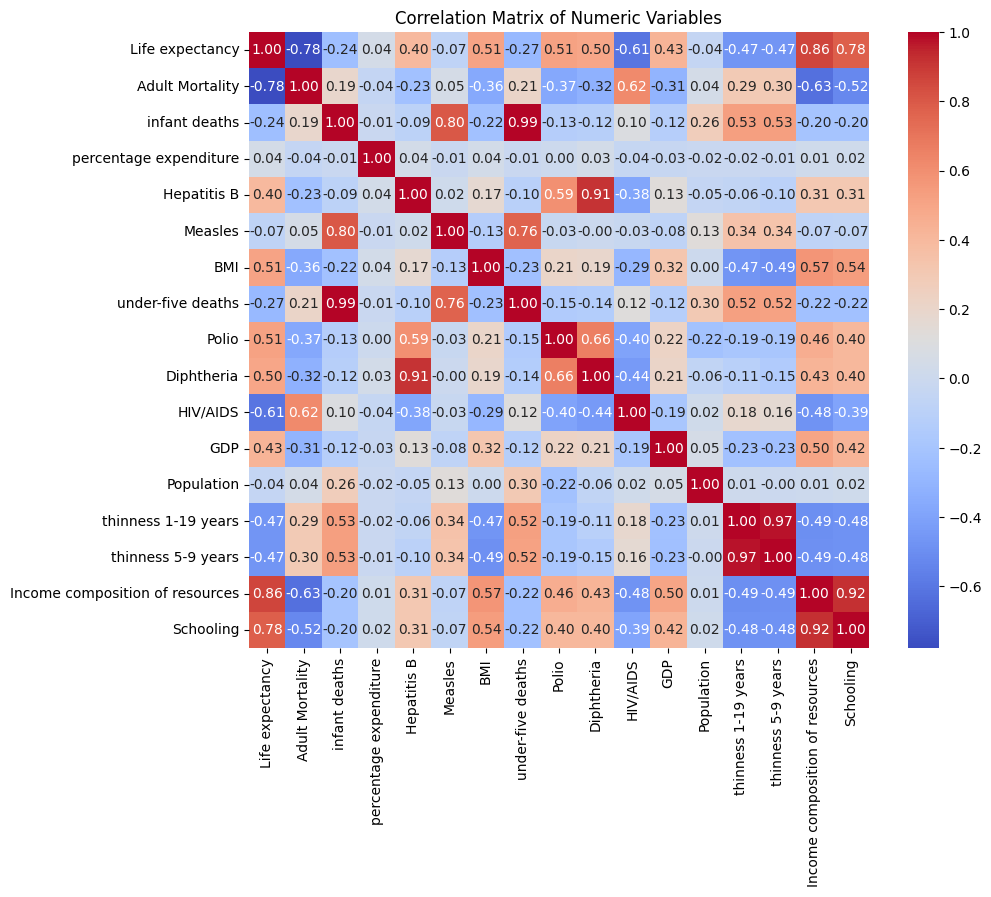

In [62]:
numeric_columns = df.select_dtypes(include=['number'])
# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

Najbardziej wynika z poziomu szkolnictwa oraz ogolnego poziomu rozwoju, ktore pozytywnie wplywaja na nia. Najbardziej negatywnie wplywa smiertelmnsc wsrod doroslych (czyli jedyne co z tego wiemy ze to nie smiertelnosc niemowalat i dzieci to zaniza) i smierci dzieci z racji hiv/aids

# Podziel zbiór danych na zbiór treningowy i testowy w stodunku 80% do 20%.

In [107]:
from sklearn.model_selection import train_test_split

numeric_columns = df.select_dtypes(include=['number'])

# Select features (X) and target variable (y)
X = numeric_columns[['Income composition of resources']]
y = numeric_columns['Life expectancy']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (145, 1) (145,)
Testing set shape: (37, 1) (37,)


In [71]:
37/182

0.2032967032967033

# Regresja linowa jednej zmiennej
- Zbuduj model regresji liniowej prostej (jednej zmiennej) umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienna objaśniająca) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [72]:
from sklearn.linear_model import LinearRegression

In [108]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [98]:
model.coef_

array([46.47309241])

In [85]:
model.intercept_

39.55863980692115

In [86]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [77]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [87]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.7407728008707116,     R2_test = 0.7687506592492667,
MAE_train = 2.7789760489217556,    MAE_test = 3.1650335989544884,
MSE_train = 16.231926885004324,    MSE_test = 17.745381843618084,
RMSE_train = 4.028886556482364,    RMSE_test = 4.212526776605472 


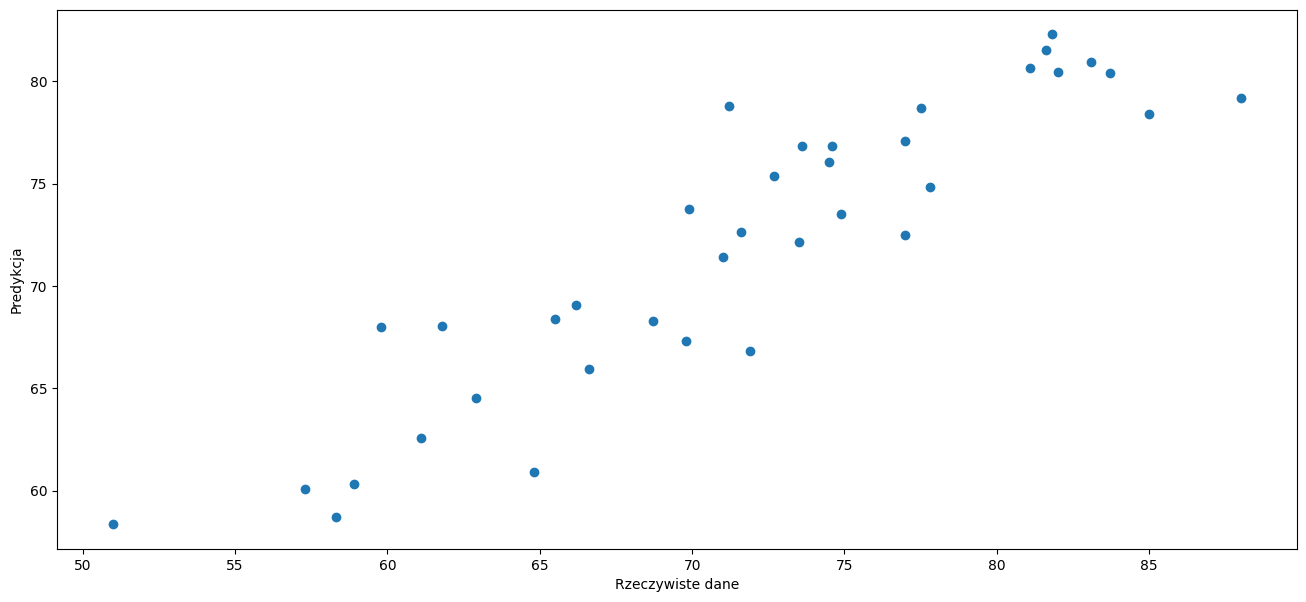

In [109]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()

Raczej niedotrenowany, ale wynika to pewnie z malej ilosci danych

# Regresja linowa wielu zmiennych
- Zbuduj model regresji liniowej wielu zmiennych umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienne objaśniające) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [99]:
numeric_columns = df.select_dtypes(include=['number'])

# Select features (X) and target variable (y)
X = numeric_columns.drop(columns=['Life expectancy'])
y = numeric_columns['Life expectancy']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (145, 16) (145,)
Testing set shape: (37, 16) (37,)


In [100]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [101]:
model.coef_

array([-2.41219893e-02,  1.00171903e-01,  4.54166612e-03, -1.54956829e-02,
       -7.63280805e-05,  2.32249421e-02, -7.41198597e-02,  2.60959686e-02,
        4.90460440e-02, -4.51269988e-01,  8.20607257e-06,  7.01009095e-09,
       -1.43420749e-01,  1.41797313e-02,  2.16357136e+01,  1.80925930e-01])

In [102]:
model.intercept_

52.81816700484275

In [103]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [105]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.876636260228587,     R2_test = 0.8194252206295802,
MAE_train = 2.0832769906638777,    MAE_test = 2.848415434394516,
MSE_train = 7.7246184465063505,    MSE_test = 13.856767767866712,
RMSE_train = 2.7793197812605785,    RMSE_test = 3.722467967339237 


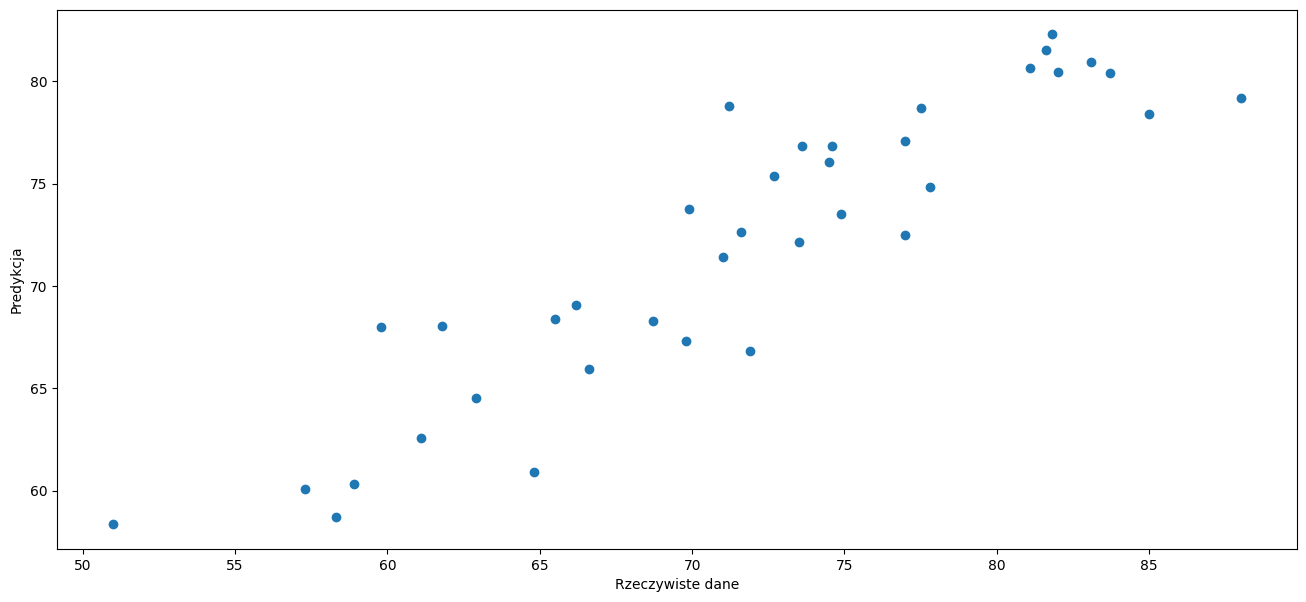

In [106]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()

Dobrze wytrenowany